In [1]:
from utils import WearDetector
from utils import Grayscaler
from utils import Cropper
from utils import Augumentator

/workspaces/coding zm
/workspaces/coding zm
/workspaces/coding zm


In [2]:
# create masks and scale 
scaler = Grayscaler('dataset/labeled','dataset/msks')
scaler.run()

Dataset size:  25
Found Colors (unique greyscale values [0..255]):  2
Minimum Threshold: 0
Maximum Threshold: 1
New greyscale values:  [  0. 255.]
Images processed and saved to: dataset/msks


[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [3]:
cropper = Cropper('dataset/imgs','dataset/prep/imgs')
cropper.run()

In [4]:
cropper_msk = Cropper('dataset/msks','dataset/prep/msks')
cropper_msk.run()

In [5]:
augumentator = Augumentator('dataset/prep/imgs','dataset/prep/msks')
augumentator.rotation(inplace=1)
augumentator.save('dataset/train/imgs','dataset/train/msks')
augumentator.h_flip(inplace=1)
augumentator.save('dataset/train/imgs','dataset/train/msks')
augumentator.v_flip(inplace=1)
augumentator.save('dataset/train/imgs','dataset/train/msks')
augumentator.v_transl(inplace=1)
augumentator.save('dataset/train/imgs','dataset/train/msks')

In [2]:
import numpy as np
import os
import cv2
data_path ={'images':'dataset/prep/imgs','masks':'dataset/prep/msks'}
images_dir = data_path['images']
masks_dir = data_path['masks']
images = []
masks = []

# Load images and corresponding masks
for filename in os.listdir(images_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png','tiff')):
        img_path = os.path.join(images_dir, filename)
        mask_path = os.path.join(masks_dir, filename)  

        # Read the image and mask
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path)  



        images.append(img)
        masks.append(mask)


[ WARN:0@3.860] global loadsave.cpp:241 findDecoder imread_('dataset/prep/msks/aug_2_image0001037.png'): can't open/read file: check file path/integrity
[ WARN:0@3.896] global loadsave.cpp:241 findDecoder imread_('dataset/prep/msks/aug_3_image0001055.png'): can't open/read file: check file path/integrity
[ WARN:0@3.931] global loadsave.cpp:241 findDecoder imread_('dataset/prep/msks/aug_1_image0001015.png'): can't open/read file: check file path/integrity
[ WARN:0@3.966] global loadsave.cpp:241 findDecoder imread_('dataset/prep/msks/aug_2_image0000857.png'): can't open/read file: check file path/integrity
[ WARN:0@4.002] global loadsave.cpp:241 findDecoder imread_('dataset/prep/msks/aug_1_image0000849.png'): can't open/read file: check file path/integrity
[ WARN:0@4.038] global loadsave.cpp:241 findDecoder imread_('dataset/prep/msks/aug_1_image0000861.png'): can't open/read file: check file path/integrity
[ WARN:0@4.073] global loadsave.cpp:241 findDecoder imread_('dataset/prep/msks/aug

In [2]:
model = WearDetector()
model.load_data({'images':'dataset/train/imgs','masks':'dataset/train/msks'})

: 

In [3]:
from utils.loss_function import MultiLabelLoss

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(model.X, model.y, test_size=0.2, random_state=42)    
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 512, 512)
(20, 512, 512)
(80, 512, 512)
(20, 512, 512)


In [5]:
print(model.X.shape)
print(model.y.shape)

(100, 512, 512)
(100, 512, 512)


In [4]:
model.train(loss=MultiLabelLoss,epochs=5)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3364 - loss: 0.3602 - val_accuracy: 0.0327 - val_loss: 0.3993
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.1874 - loss: 0.4098 - val_accuracy: 0.0000e+00 - val_loss: 0.3996
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.0000e+00 - loss: 0.3995 - val_accuracy: 0.0000e+00 - val_loss: 0.3996
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.0000e+00 - loss: 0.4519 - val_accuracy: 0.0000e+00 - val_loss: 0.3996
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.0000e+00 - loss: 0.4685 - val_accuracy: 0.0000e+00 - val_loss: 0.3996
Training complete with final accuracy: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.5259


2024-07-21 13:56:48.376776: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 671088640 exceeds 10% of free system memory.


Evaluation results - Loss: 0.5259483456611633, Accuracy: 0.00%


In [5]:
model.save_model('models/wear_detector_model_5epochs.h5')

/opt/conda/envs/kip/lib/python3.12/site-packages/keras/src/models/model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


Model saved to models/wear_detector_model.h5


In [ ]:
param_grid = {
            'lr': [0.01, 0.001],
            'batch_size': [8,16, 32],
            'epochs':[5,10 , 20]
            }


model.grid_search_train(param_grid)

In [8]:
model.load_model('models/wear_detector_model.h5')

Model loaded from models/wear_detector_model.h5


In [11]:
debug_pred =model.predict('data/evaluation data/debug')

In [19]:
model.model.input_shape

(None, 512, 512, 1)

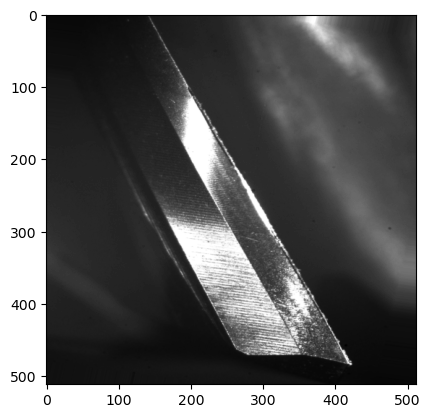

In [11]:
import matplotlib.pyplot as plt
plt.imshow(model.X[34], cmap='gray' if model.X[34].ndim == 2 else None)

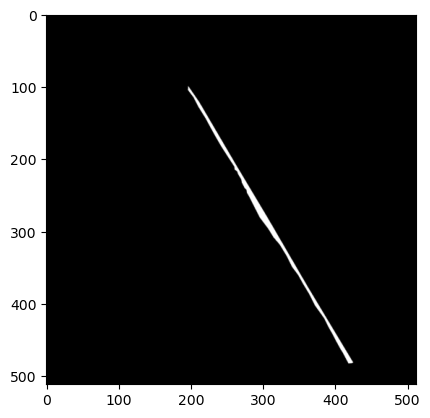

In [12]:
import matplotlib.pyplot as plt
plt.imshow(model.y[34], cmap='gray' if model.y[34].ndim == 2 else None)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(model.X,model.y,test_size=.2)

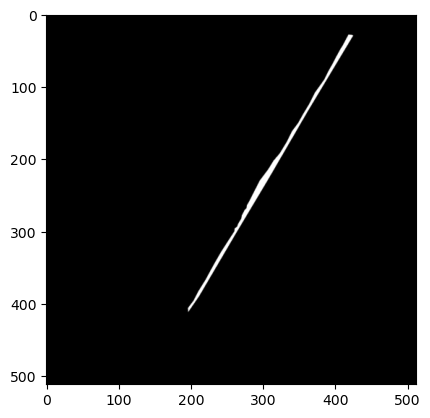

In [13]:
import matplotlib.pyplot as plt
plt.imshow(y_test[0], cmap='gray' if y_test[0].ndim == 2 else None)

In [29]:
print(model.model.input_shape)
print(np.array(X_test).shape)

(None, 512, 512, 1)
(4, 2048, 2448, 3)


In [9]:
import numpy as np
predicted_masks = model.predict_for_pics(np.array(X_test))

2024-07-21 13:46:55.086086: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 671088640 exceeds 10% of free system memory.


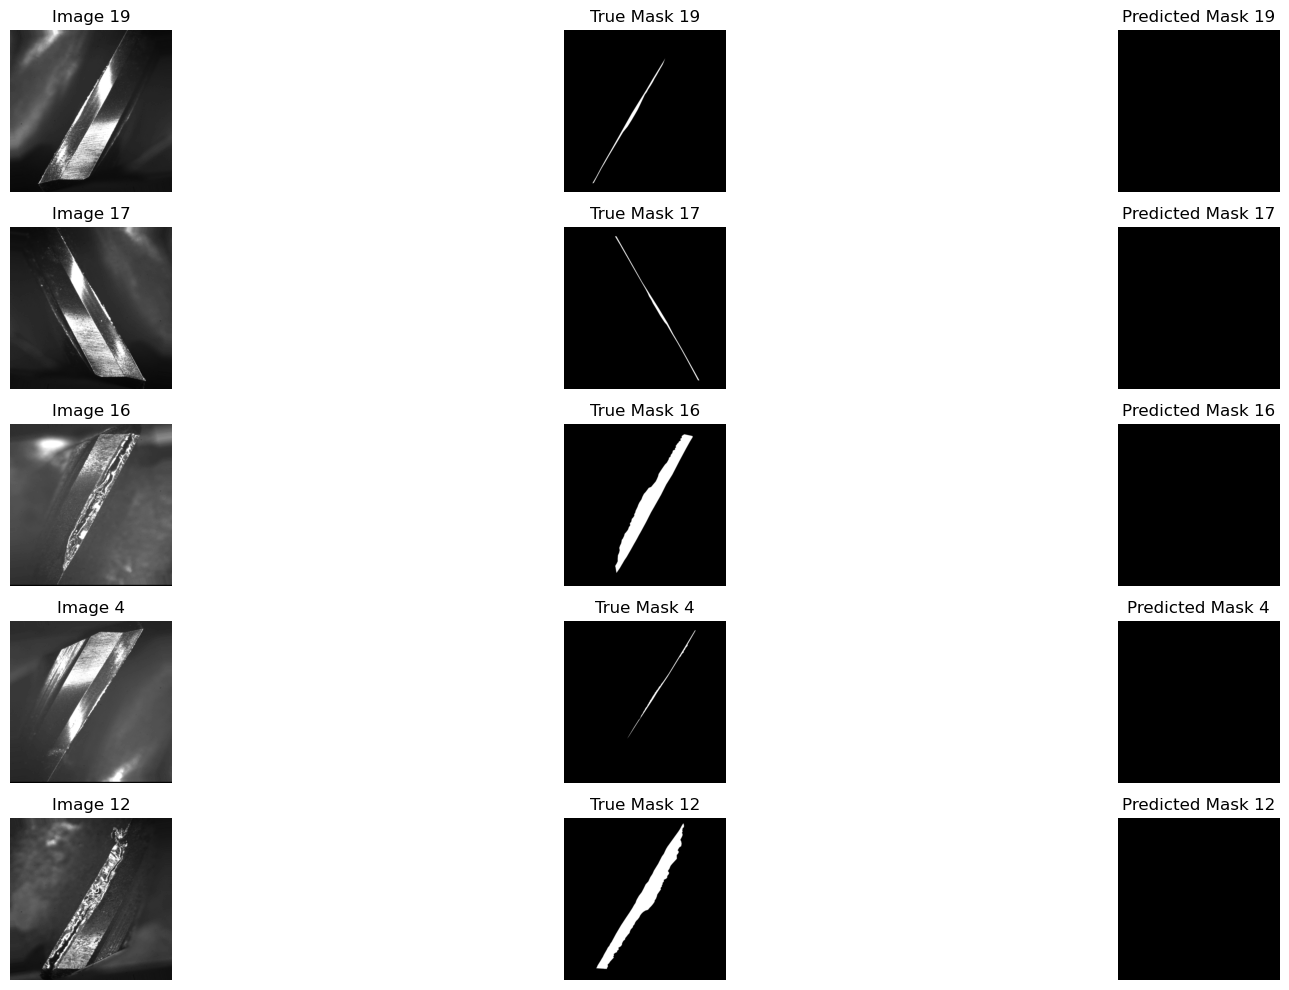

In [10]:
import matplotlib.pyplot as plt
import random
def display_predictions(images, true_masks, predicted_masks, num_images=5):
    """
    Display original images, true masks, and predicted masks side by side.

    Parameters:
    - images: List of images.
    - true_masks: List of true masks.
    - predicted_masks: List of predicted masks.
    - num_images: Number of image-mask pairs to display.
    """
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        idx = random.randint(0, len(images) - 1)
        image = images[idx]
        true_mask = true_masks[idx]
        predicted_mask = predicted_masks[idx]
        
        # Display image
        plt.subplot(num_images, 3, 3 * i + 1)
        plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
        plt.title(f'Image {idx + 1}')
        plt.axis('off')
        
        # Display true mask
        plt.subplot(num_images, 3, 3 * i + 2)
        plt.imshow(true_mask, cmap='gray')
        plt.title(f'True Mask {idx + 1}')
        plt.axis('off')
        
        # Display predicted mask
        plt.subplot(num_images, 3, 3 * i + 3)
        plt.imshow(predicted_mask, cmap='gray')
        plt.title(f'Predicted Mask {idx + 1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display predictions
display_predictions(X_test, y_test, predicted_masks)

In [13]:
model.evaluate(X_test,y_test)

2024-07-21 13:48:30.762330: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 671088640 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.4484
Evaluation results - Loss: 0.4484294056892395, Accuracy: 0.00%


In [3]:
from keras import backend as K

def dice_loss(y_true, y_pred):
    numerator = 2 * K.sum(y_true * y_pred, axis=(1,2,3))
    denominator = K.sum(y_true + y_pred, axis=(1,2,3))

    return 1 - numerator / denominator
model.train(loss=dice_loss,lr=0.0001,epochs=100)

Epoch 1/100


2024-07-21 16:43:33.747953: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 335544320 exceeds 10% of free system memory.
2024-07-21 16:43:34.506805: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 335544320 exceeds 10% of free system memory.
2024-07-21 16:43:34.549636: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-07-21 16:43:34.549676: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.


1/7 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.0708 - loss: 0.5039

2024-07-21 16:43:37.361237: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 335544320 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.1215 - loss: 0.4102 - val_accuracy: 0.8446 - val_loss: 0.3995
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4079 - loss: 0.4437 - val_accuracy: 0.7633 - val_loss: 0.3994
Epoch 3/100


In [4]:
model.save_model('models/wear_detector_model_10epochs_10e3lr_dice_loss.h5')

/opt/conda/envs/kip/lib/python3.12/site-packages/keras/src/models/model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


Model saved to models/wear_detector_model_10epochs_10e3lr_dice_loss.h5
